# $\mathbb{S_7}$ valued data, on line-graph, i.e. $\mathbb{S_7}$-signal

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [1]:
import numpy as np
#import quaternion
import matplotlib.pyplot as plt
import scipy
import time
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
import condat_tv
import imp
import relaxed_tikhonov_sphere

iter = 300
tau = 0.1
rho = 1

/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_39119/541707013.py:10: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
imp.reload(relaxed_tikhonov_sphere)

<module 'relaxed_tikhonov_sphere' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [3]:
Noise, Data = relaxed_tikhonov_sphere.sample_vMF_signal(50,8,30)

normalization test :  1.0


### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...

In [4]:
lamr = 30

q, dataadmm = relaxed_tikhonov_sphere.ADMM_red(Noise, Data, 60, 3*rho, 1*iter+1, 5)

iteration 	| func-value 	| marginal-cost 	| sherical-error
--------------------------------------------------------------------------
0 		| -5.385e+05 	|  4.664e+03 		|  9.930e-01
50 		|  1.062e+02 	|  4.243e+01 		| -1.587e-04
100 		|  1.113e+02 	|  4.242e+01 		|  1.156e-07
150 		|  1.113e+02 	|  4.242e+01 		|  2.223e-08
200 		|  1.113e+02 	|  4.242e+01 		|  1.763e-09
iteration : 204 9.502678871154785
250 		|  1.113e+02 	|  4.242e+01 		|  1.131e-10
300 		|  1.113e+02 	|  4.242e+01 		|  9.067e-12
240 111.3350401920914 10.96796989440918
finale 		|  1.113e+02 	|  4.242e+01 		| sphered


In [5]:
print('RMSE(Solution) \t=', "%10.3e"%(np.sqrt(np.sum((q - Data))**2)/1000), ' \t\t| RMSE(Noise) \t=', "%10.3e"%(np.sqrt(np.sum((Noise - Data))**2)/1000)) 
print('MAE(Solution) \t=', "%10.3e"%(np.sum(np.abs(q - Data)/1000)), ' \t\t| MAE(Noise) \t=', "%10.3e"%(np.sum(np.abs(Noise - Data)/1000))) 
print('cMSE(Solution) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/1000), ' \t\t| cMSE(Noise) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(Noise*Data,0))**2)/1000)) 

RMSE(Solution) 	=  1.940e-02  		| RMSE(Noise) 	=  1.046e-01
MAE(Solution) 	=  2.349e-01  		| MAE(Noise) 	=  1.072e+00
cMSE(Solution) 	=  1.300e-02  		| cMSE(Noise) 	=  2.310e-01


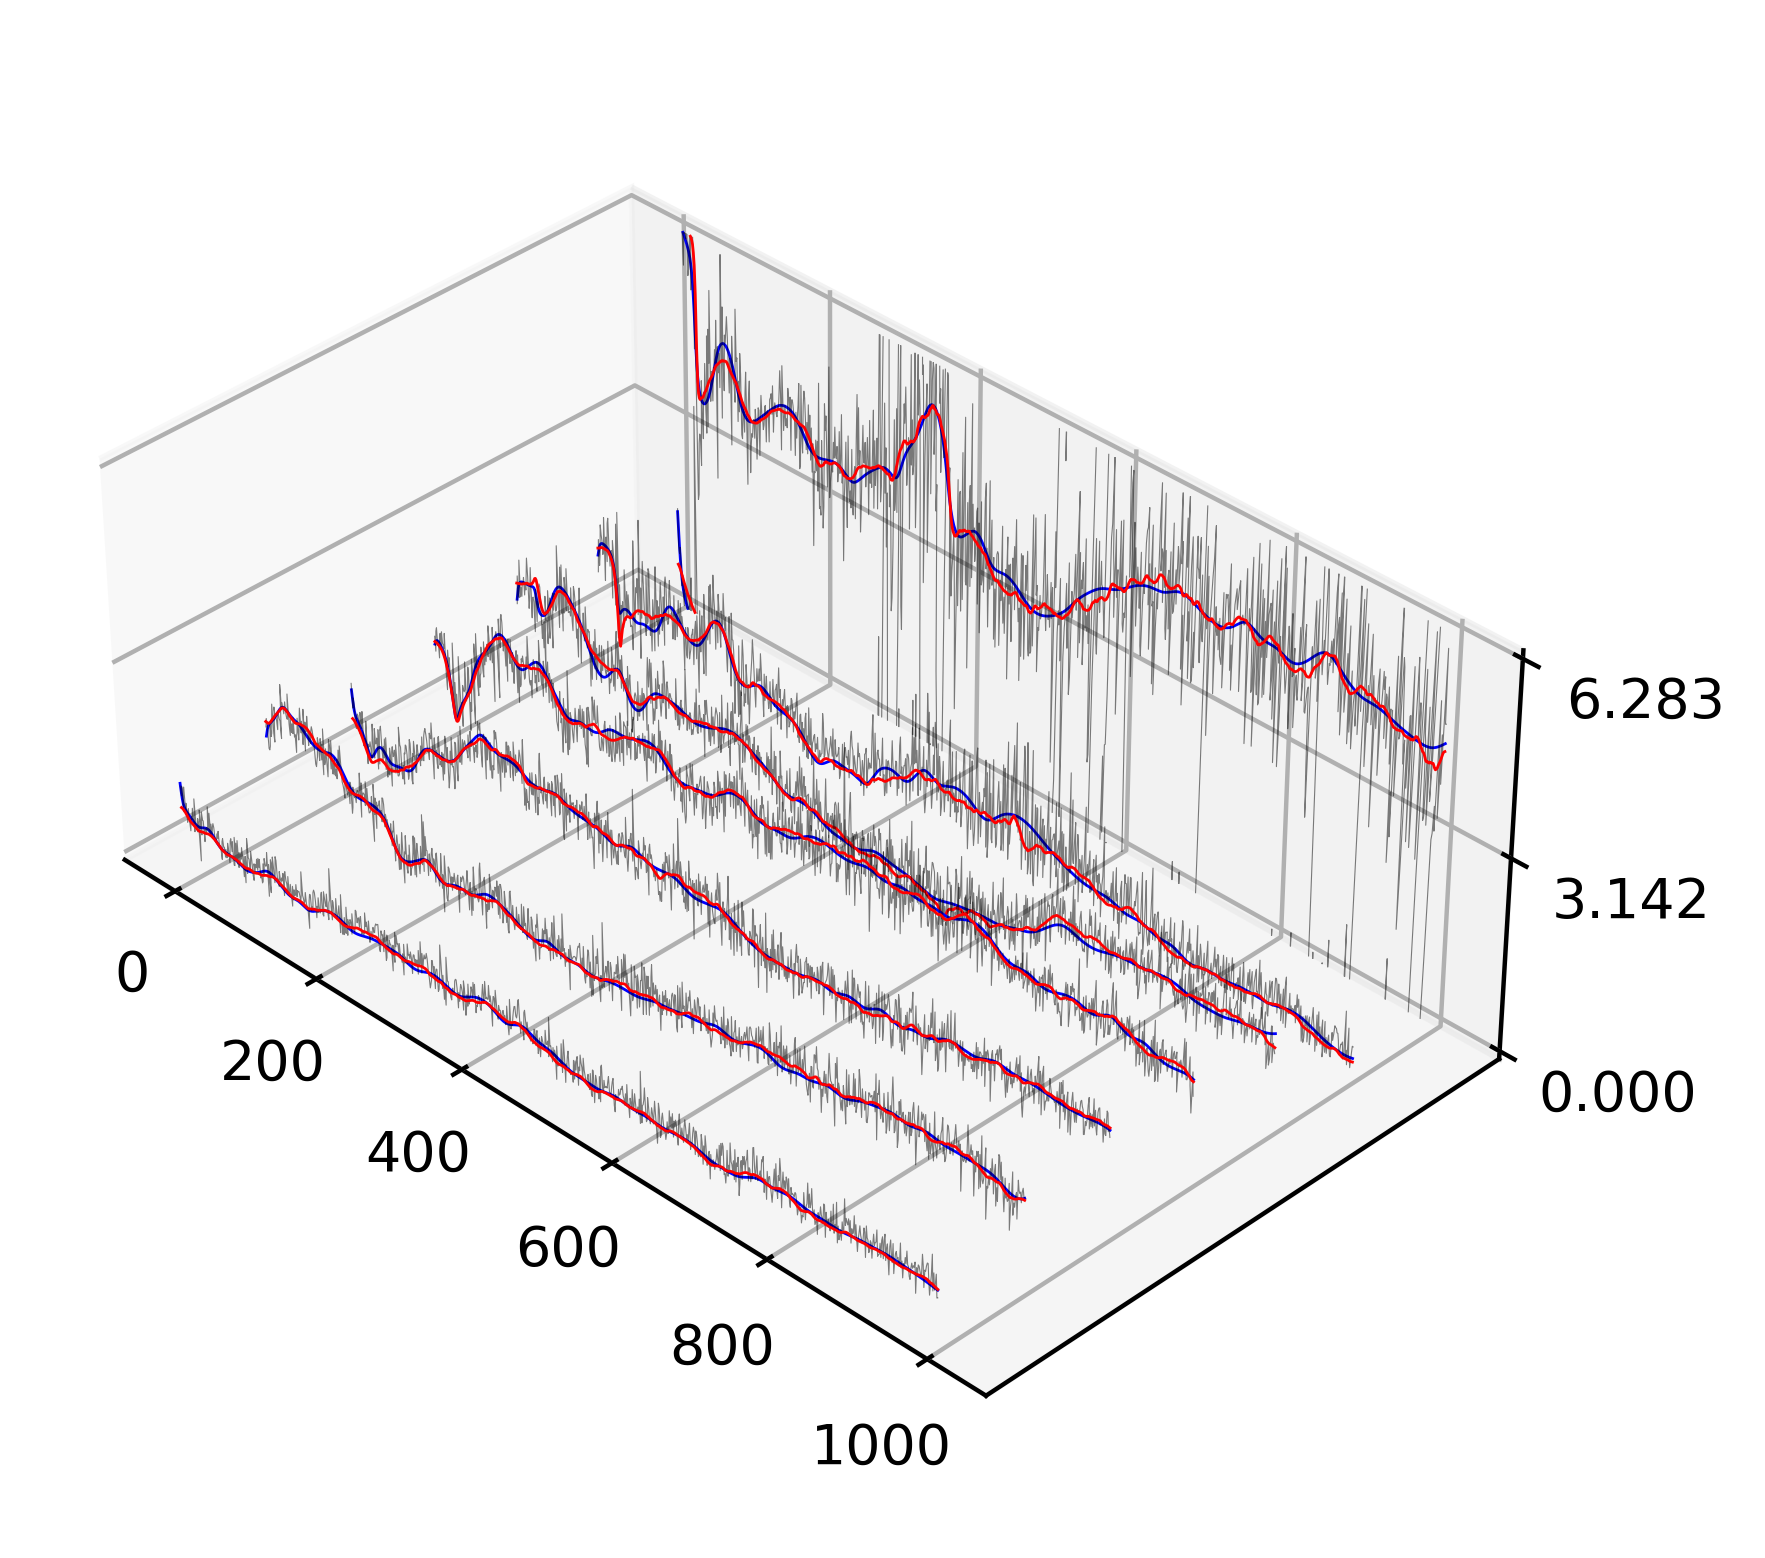

In [6]:
relaxed_tikhonov_sphere.plotS7(Noise, Data, q)